# Escolha do Dataset
Escolhi o dataset "Daily Minimum Temperatures in Melbourne" disponível no Kaggle. Este dataset contém as temperaturas mínimas diárias registradas em Melbourne, Austrália, de 1981 a 1990.

Link do Dataset: https://www.kaggle.com/datasets/paulbrabban/daily-minimum-temperatures-in-melbourne?resource=download

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_absolute_error

In [2]:
# Carregar o dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Descrição das Colunas do Dataset
O dataset possui as seguintes colunas:

Date: A data da medição no formato YYYY-MM-DD.
Temp: Temperatura mínima diária registrada em graus Celsius.

In [3]:
# Visualização inicial dos dados
print(data.head())

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


In [4]:
# Pré-processamento dos dados
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Temp']])

In [5]:
# Função para criar as sequências de entrada (X) e saída (y)
def create_sequences(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

In [6]:
# Definindo a quantidade de passos de tempo
time_steps = 30
X, y = create_sequences(data_scaled, time_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [7]:
# Divisão dos dados em treino e teste
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [8]:
# Criação do modelo RNN
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Treinamento do modelo
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - loss: 0.1036 - val_loss: 0.0686
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0758 - val_loss: 0.0671
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0763 - val_loss: 0.0678
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0752 - val_loss: 0.0670
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0750 - val_loss: 0.0669
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0724 - val_loss: 0.0679
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0746 - val_loss: 0.0689
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0773 - val_loss: 0.0678
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0711 - val_loss: 0.0670
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0734 - val_loss: 0.0680
Epoch 11/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0730 - val_loss: 0.0656
Epoch 12/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0724 -

In [10]:
# Predição e inversão da escala
y_pred = model.predict(X_test)
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


# Escolha da Métrica
Para problemas de predição de séries temporais com variáveis contínuas como temperatura, a métrica escolhida é o Mean Absolute Error (MAE).

Justificativa:

**MAE é intuitiva e fácil de interpretar:** indica o erro médio absoluto entre as previsões e os valores reais.

**Não é sensível a outliers de forma tão extrema** quanto o Mean Squared Error (MSE), o que é adequado para predições de temperatura, onde outliers não têm impacto tão significativo quanto em outros contextos.

**MAE fornece uma medida direta e compreensível de erro médio** em termos das unidades da variável, neste caso, graus Celsius.

In [11]:
# Avaliação do modelo
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f'MAE: {mae:.3f} graus Celsius')

MAE: 1.757 graus Celsius


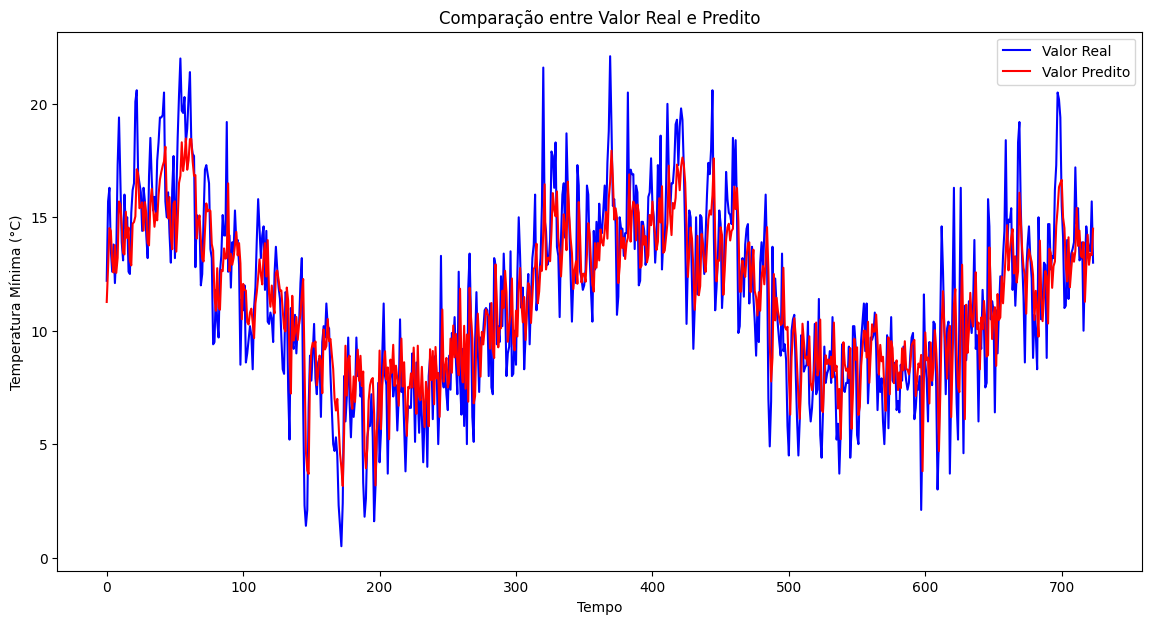

In [12]:
# Gráfico comparando valores reais e preditos
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv, label='Valor Real', color='blue')
plt.plot(y_pred_inv, label='Valor Predito', color='red')
plt.title('Comparação entre Valor Real e Predito')
plt.xlabel('Tempo')
plt.ylabel('Temperatura Mínima (°C)')
plt.legend()
plt.show()